<a href="https://colab.research.google.com/github/qudseen/DLC/blob/main/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import pathlib
import imageio

In [56]:
#File paths
base_dir = '/content/drive/My Drive/Dataset/'

train = base_dir+'Train'
train_covid_dir = base_dir+'Train/Covid/'
train_normal_dir=base_dir+'Train/Normal/'

val = base_dir+'Val'
val_normal_dir= base_dir+'Val/Normal/'
val_covid_dir= base_dir+'Val/Covid/'

train_cv = [train_covid_dir+"{}".format(i) for i in os.listdir(train_covid_dir) ]
train_normal = [train_normal_dir+"{}".format(i) for i in os.listdir(train_normal_dir) ]

val_cv= [val_covid_dir+"{}".format(i) for i in os.listdir(val_covid_dir) ]
val_normal= [val_normal_dir+"{}".format(i) for i in os.listdir(val_normal_dir) ]



In [3]:
print ("Total Images:",len(train_cv+train_normal+val_cv+val_normal))
print ("Total Covid images:",len(train_cv+val_cv))
print ("Total Nomral images:",len(train_normal+val_normal))

Total Images: 334
Total Covid images: 160
Total Nomral images: 174


In [54]:
# Split as : roughly 80% train and 20% Val
cv = train_cv+val_cv
normal = train_normal+val_normal
train_images = cv[:128]+normal[:139]
val_images = cv[128:]+normal[139:]


In [6]:
print("Total Train Images %s containing %s covid and %s normal images"
      % (len(train_images),len(cv[:128]),len(normal[:139])))
print("Total validation Images %s containing %s covid and %s normal images"
      % (len(val_images),len(cv[128:]),len(normal[139:])))

Total Train Images 267 containing 128 covid and 139 normal images
Total validation Images 67 containing 32 covid and 35 normal images


In [7]:
import random
random.shuffle(train_images)
random.shuffle(val_images)

In [8]:
print(train_images[0])

/content/drive/My Drive/Dataset/Train/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg


In [9]:
#Labelling and storing in 3D array
# import cv2
# img_size = 224

# def preprocess_image(image_list):

#     X = [] # images
#     y = [] #labels (0 for Normal or 1 for covid)
#     count=0

#     for image in image_list:

#         try:

#             img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)

#             img=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_CUBIC)

#             #convert image to 2D to 3D
#             img = np.dstack([img, img, img])

#             # Normalalize Image
#             img = img.astype(np.float32)/255.

#             count=count+1

#             X.append(img)


#         except:
#             continue
#         if 'NORMAL' in image:
#             y.append(0)

#         elif 'IM' in image:
#             y.append(0)

#         else:
#             y.append(1)


#     return X, y

In [10]:
# X, y = preprocess_image(train_images) #for training data

In [11]:
# P, q = preprocess_image(val_images)  #for validation data

In [47]:
# # Check all the images getting labels or not
# arr=y
# uniqueValues, occurCount = np.unique(arr, return_counts=True)

# print("Unique Values : " , uniqueValues)
# print("Occurrence Count : ", occurCount)
# arr=q
# uniqueValues, occurCount = np.unique(arr, return_counts=True)

# print("Unique Values : " , uniqueValues)
# print("Occurrence Count : ", occurCount)


Unique Values :  [0 1]
Occurrence Count :  [139 128]
Unique Values :  [0 1]
Occurrence Count :  [35 32]


In [52]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications



In [137]:
gen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip = True,
    vertical_flip = True
)

In [138]:
train_generator = gen.flow_from_directory(
    directory = train,
    color_mode="rgb",
    target_size = (224,224), # image height , image width
    class_mode="binary",
    batch_size=8,
    shuffle=True
)

Found 274 images belonging to 2 classes.


In [139]:
validation_generator = gen.flow_from_directory(
    directory = val,
    color_mode="rgb",
    target_size = (224,224), # image height , image width
    class_mode="binary",
    batch_size=8,
    shuffle=True
)

Found 60 images belonging to 2 classes.


In [91]:
x,y = next(train_generator)
x.shape

(8, 224, 224, 3)

In [135]:
a = train_generator.class_indices
class_names = list(a.keys())

In [125]:
from sklearn.utils import resample

In [180]:
x_majority = x[y == 0]
x_minority = x[y == 1]
n_samples_to_remove=14
x_majority_undersampled = resample(x_majority, n_samples=n_samples_to_remove, random_state=42)

In [181]:
x_balanced = np.vstack((x_majority_undersampled, x_minority))
y_balanced = np.hstack((np.zeros(len(x_majority_undersampled)), np.ones(len(x_minority))))

In [67]:
# X1 = np.array(X)
# y1 = np.array(y)
# P1 = np.array(P)
# q1= np.array(q)

In [146]:
pip install imbalanced-learn

In [147]:
from imblearn.over_sampling import SMOTE

In [163]:
# smote = SMOTE(sampling_strategy='auto',k_neighbors= 2, random_state=42)
# x_flattened=x.reshape(8,-1)
# x_resampled, y_resampled = smote.fit_resample(x_flattened, y)

In [164]:
# x_resampled = x_resampled.reshape(x_resampled.shape[0], 224, 224, 3)

In [159]:
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight(class_weight='balanced',
#                                                   classes=np.unique(y),
#                                                   y=y)
# class_weights = dict(enumerate(class_weights))
# print(class_weights)

{0: 0.8, 1: 1.3333333333333333}


In [119]:
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [120]:
#Model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [121]:
# compiling model
model.compile(loss=keras.losses.binary_crossentropy , optimizer="adam" , metrics=["accuracy" ])

In [182]:
#Training model
hist = model.fit(x_balanced,y_balanced,
          batch_size=20,
          epochs=10,
          verbose=1,
          validation_data=validation_generator )

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.2157e-05 - accuracy: 1.0000 - val_loss: 0.7508 - val_accuracy: 0.9167
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 3.7053e-04 - accuracy: 1.0000 - val_loss: 0.5757 - val_accuracy: 0.9333
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 4.3922e-05 - accuracy: 1.0000 - val_loss: 0.5762 - val_accuracy: 0.9333
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 7.1473e-05 - accuracy: 1.0000 - val_loss: 0.4524 - val_accuracy: 0.9500
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 5.4166e-05 - accuracy: 1.0000 - val_loss: 0.4020 - val_accuracy: 0.9500
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 2.4021e-05 - accuracy: 1.0000 - val_loss: 0.2329 - val_accuracy: 0.9667
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 5.6588e-05 - accuracy: 1.0000 - val_loss: 0.6535 - val_accuracy: 0.9333
Epoch 8/10
1/

In [108]:
from matplotlib import pyplot as plt

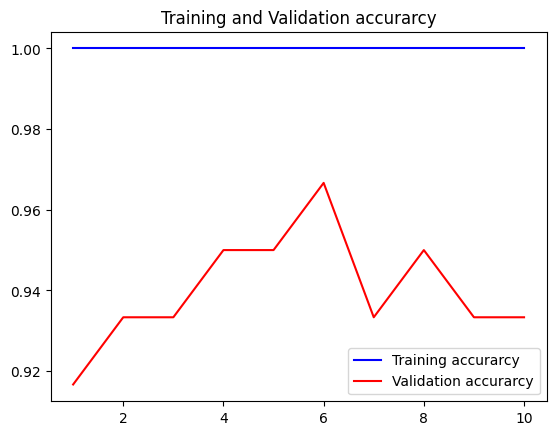

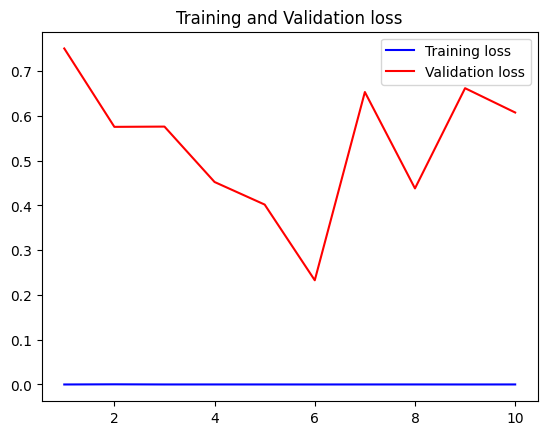

In [183]:
#Train and Val curve
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [110]:
import sklearn

In [184]:
p, q = next(validation_generator)

In [112]:
p.shape

(8, 224, 224, 3)

In [80]:
q.shape

(8,)

In [188]:
from sklearn.metrics import classification_report
#Classification Report
y_pred= model.predict(x_balanced)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_balanced,y_pred_classes))

1/1 [==============================] - 0s 26ms/step
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        14
         1.0       0.00      0.00      0.00         3

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted avg       0.68      0.82      0.74        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
